In [109]:
from scipy.io.wavfile import read
from IPython.display import Audio, display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import numpy as np
import librosa
import torch
import os

# Load dataset

In [2]:
dataset = "dataset/splitted/"
num_labels = 10

In [79]:
labels = []
audios = []
for label in range(num_labels):
    label_path = f"{dataset}/{label}"
    for file in sorted(os.listdir(label_path)):
        file_path = label_path + "/" + file
        sample_rate, audio = read(file_path)
        labels.append(label)
        audios.append(audio)
labels = np.array(labels)

# Prepare features

In [100]:
max_duration_sec = 0.6
max_duration = int(max_duration_sec * sample_rate + 1e-6)

In [101]:
features = []
features_flatten = []
for audio in audios:
    if len(audio) < max_duration:
        audio = np.pad(audio, (0, max_duration - len(audio)), constant_values=0)
    feature = librosa.feature.melspectrogram(audio.astype(float), sample_rate, n_mels=16, fmax=1000)
    features.append(feature)
    features_flatten.append(feature.reshape(-1))

print([feature.shape for feature in features])

[(16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57), (16, 57)]


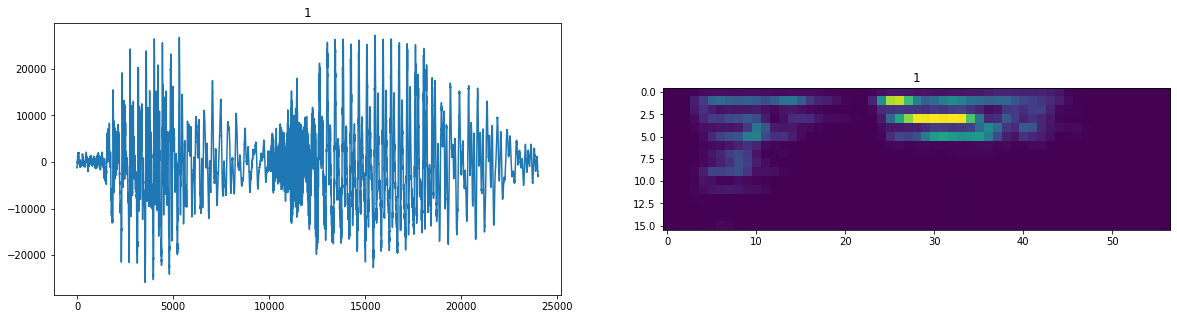

In [136]:
def plot(idx):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.title(f"{labels[idx]}")
    plt.plot(audios[idx])

    plt.subplot(1, 2, 2)
    plt.title(f"{labels[idx]}")
    plt.imshow(features[idx])

    display(Audio(audios[idx], rate=sample_rate))
plot(4)

In [106]:
features_train, features_test, labels_train, labels_test = train_test_split(features_flatten, labels)

# Train model

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


In [131]:
# model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model = MLPClassifier(hidden_layer_sizes=(20,))

In [132]:
model.fit(X=features_train, y=labels_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

# Validate model

In [133]:
labels_test_predicted = model.predict(X=features_test)

In [134]:
(labels_test_predicted == labels_test).mean()

0.5

In [135]:
labels_test_predicted

array([0, 6, 2, 0, 5, 2, 1, 7])